In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_raw = pd.read_csv('baseball.csv')
df_raw.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


<AxesSubplot:>

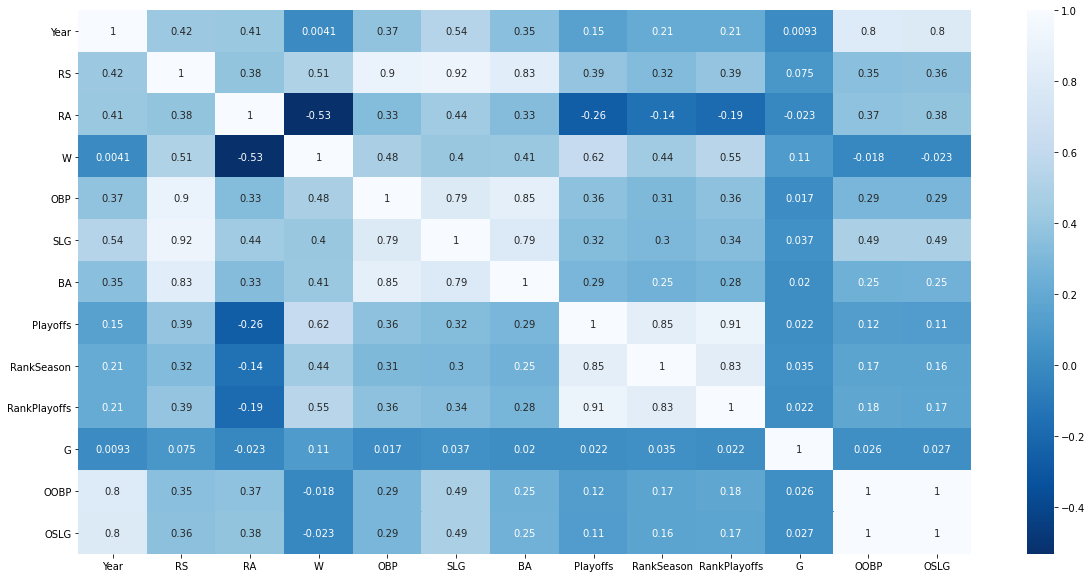

In [13]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_raw.corr(), annot=True, cmap='Blues_r')

In [3]:
# df.drop(['League','Year', 'Team', 'G', 'OOBP', 'OSLG'], axis=1, inplace=True)
df_raw.fillna(0, inplace=True)
X = df_raw.drop(['League','Year', 'Team', 'G', 'OOBP', 'OSLG', 'W'], axis=1)
y = df_raw.W

In [12]:
display(X.head())
display(y.head())

,RS,RA,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs
0,734,688,0.328,0.418,0.259,0,0.0,0.0
1,700,600,0.320,0.389,0.247,1,4.0,5.0
2,712,705,0.311,0.417,0.247,1,5.0,4.0
3,734,806,0.315,0.415,0.260,0,0.0,0.0
4,613,759,0.302,0.378,0.240,0,0.0,0.0


0    81
1    94
2    93
3    69
4    61
Name: W, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [5]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [8]:
residuo = pd.concat([y_test, df_raw.Team], axis=1, join='inner').set_index('Team')
residuo.columns = ['y_test']
y_predict = [model.predict([X_test.iloc[i].values])[0] for i in range(0, len(X_test))]
residuo['y_predict'] = y_predict
residuo['residuo'] = residuo.y_test - residuo.y_predict

In [11]:
residuo

,y_test,y_predict,residuo
Team,,,
ATL,82,75,7
MIL,92,97,-5
DET,84,83,1
NYY,97,96,1
HOU,76,75,1
...,...,...,...
KCR,64,75,-11
TEX,83,79,4
PHI,101,103,-2
